<a href="https://colab.research.google.com/github/Rishilshajan/Code-Your-ML/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Necessary Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
#Loading the Dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['Outcome'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
#Printing Detailed Description of the Dataset
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
#Printing the Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
#Printing Statical summary of dataset
print(df.describe())

       mean radius  mean texture  ...  worst fractal dimension     Outcome
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%      11.700000     16.170000  ...                 0.071460    0.000000
50%      13.370000     18.840000  ...                 0.080040    1.000000
75%      15.780000     21.800000  ...                 0.092080    1.000000
max      28.110000     39.280000  ...                 0.207500    1.000000

[8 rows x 31 columns]


In [5]:
#Printing the last 5 rows of data
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Outcome
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
#Printing the Value counts of outcome
print(" 0. Malignant(Cancerous) \n 1. Benign(Non-cancerous)\n")
print(df['Outcome'].value_counts())

 0. Malignant(Cancerous) 
 1. Benign(Non-cancerous)

Outcome
1    357
0    212
Name: count, dtype: int64


In [10]:
#Checking null values for each column
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Outcome                    0
dtype: int64


/tmp/ipython-input-442289531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


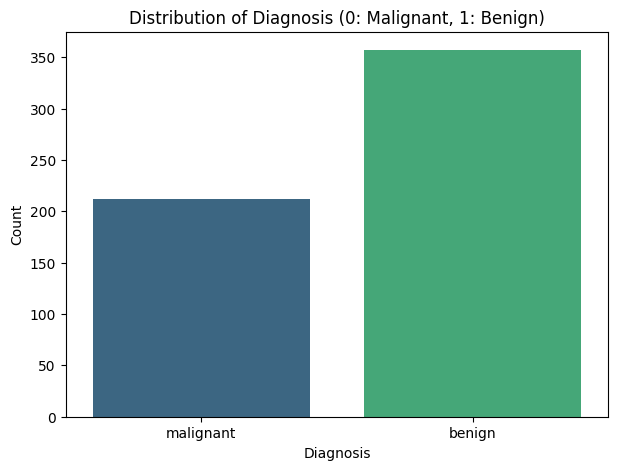

In [24]:
#Countplot of Dataset
plt.figure(figsize=(7, 5))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Diagnosis (0: Malignant, 1: Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=cancer.target_names)
plt.show()

In [25]:
#Selecting all the key features and later visualizing it
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity']

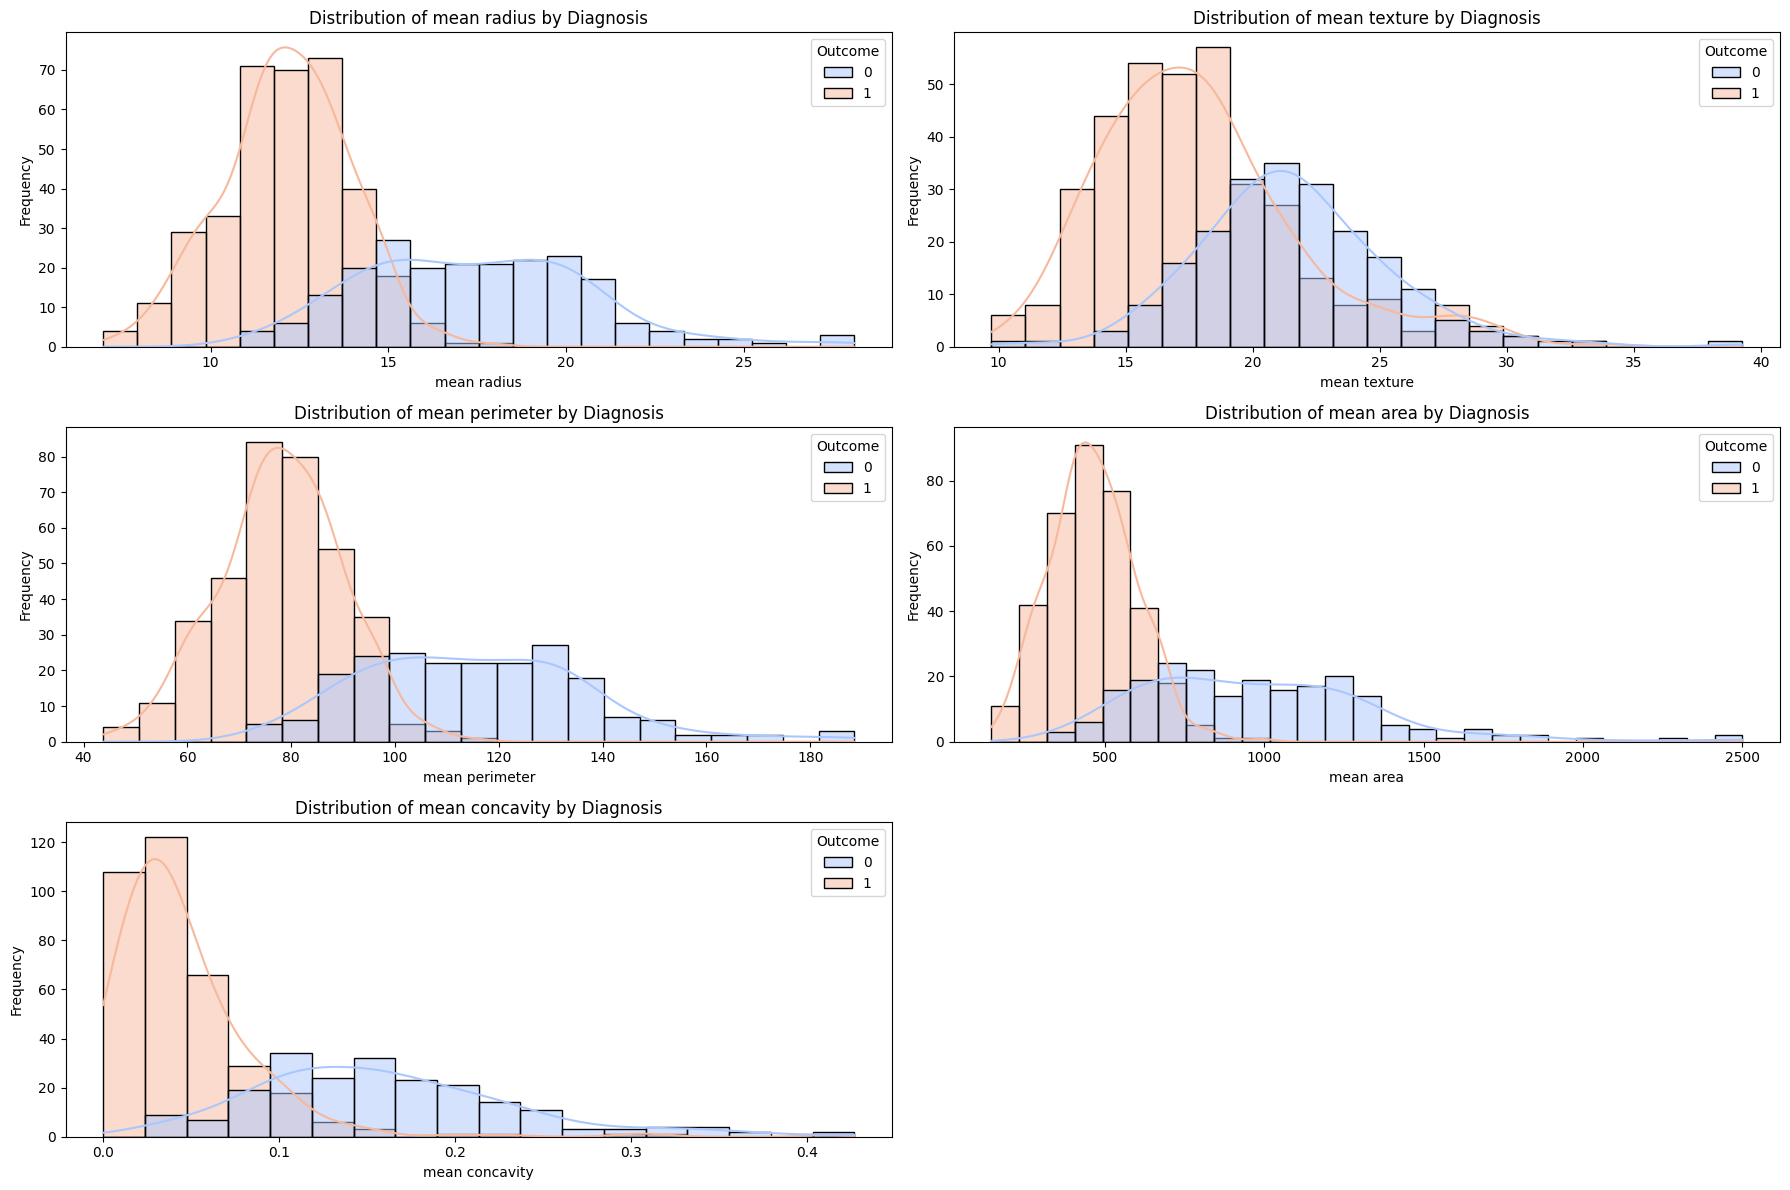

In [27]:
#Histplot of the selected_features
plt.figure(figsize=(18, 12))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, palette='coolwarm')
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


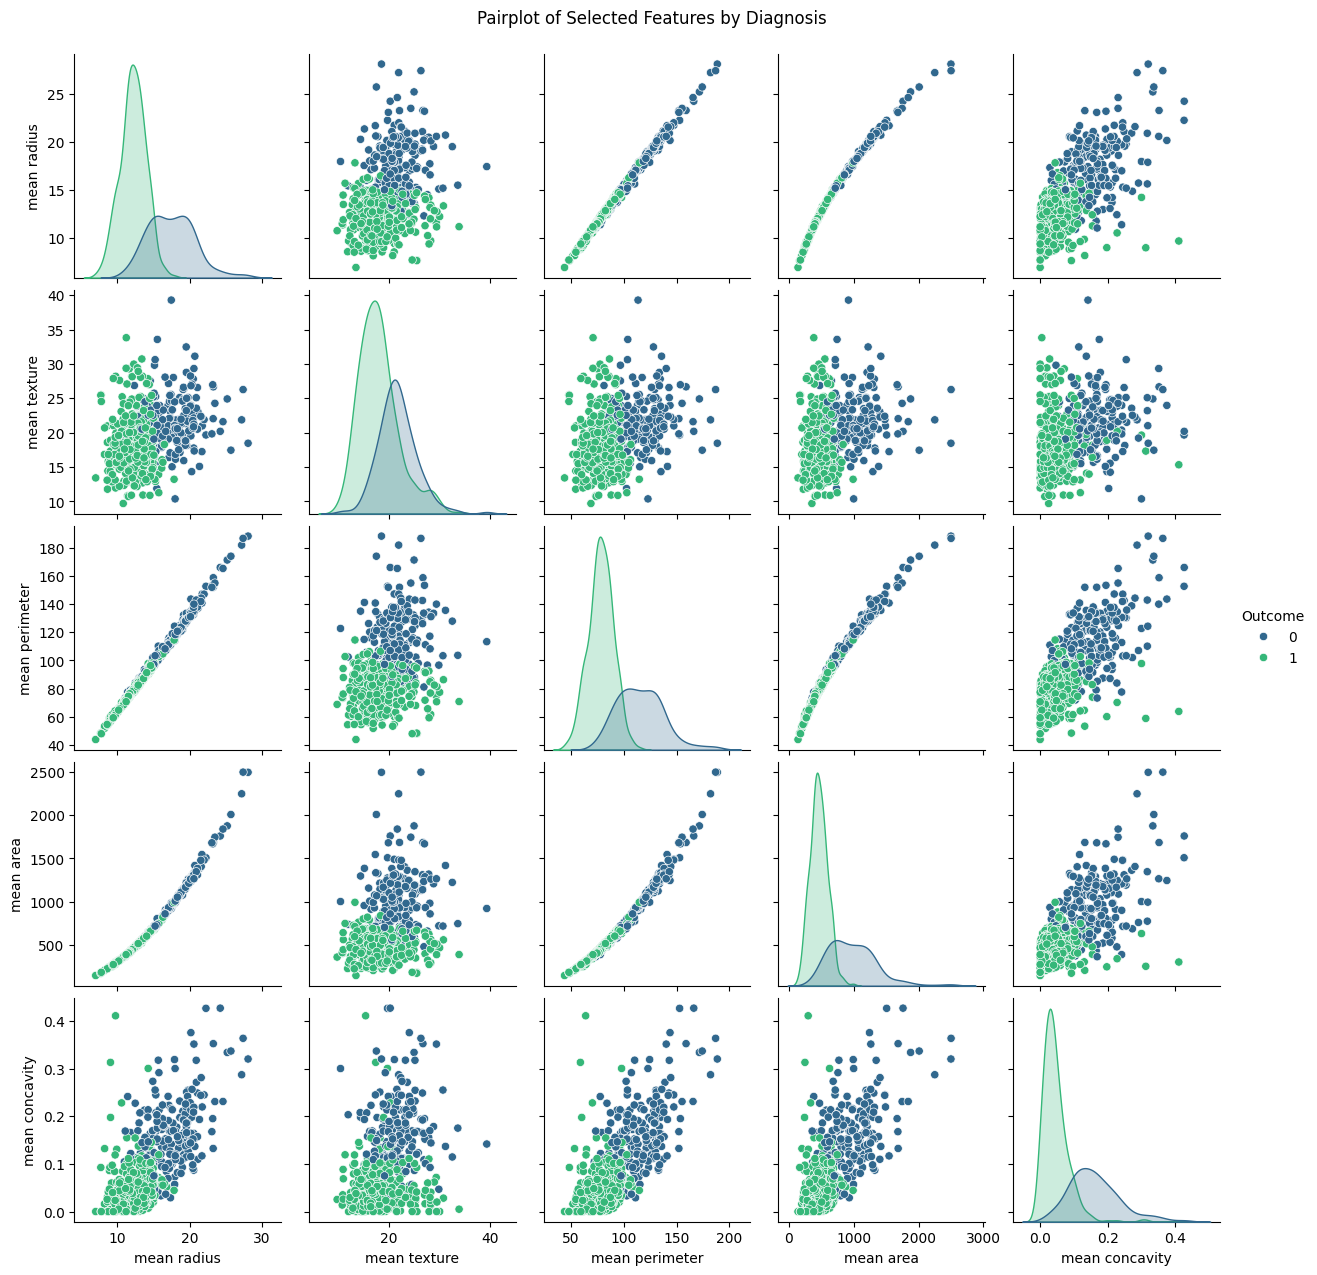

In [29]:
#Pairplot of the Dataset
sns.pairplot(df, vars=selected_features, hue='Outcome', palette='viridis')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

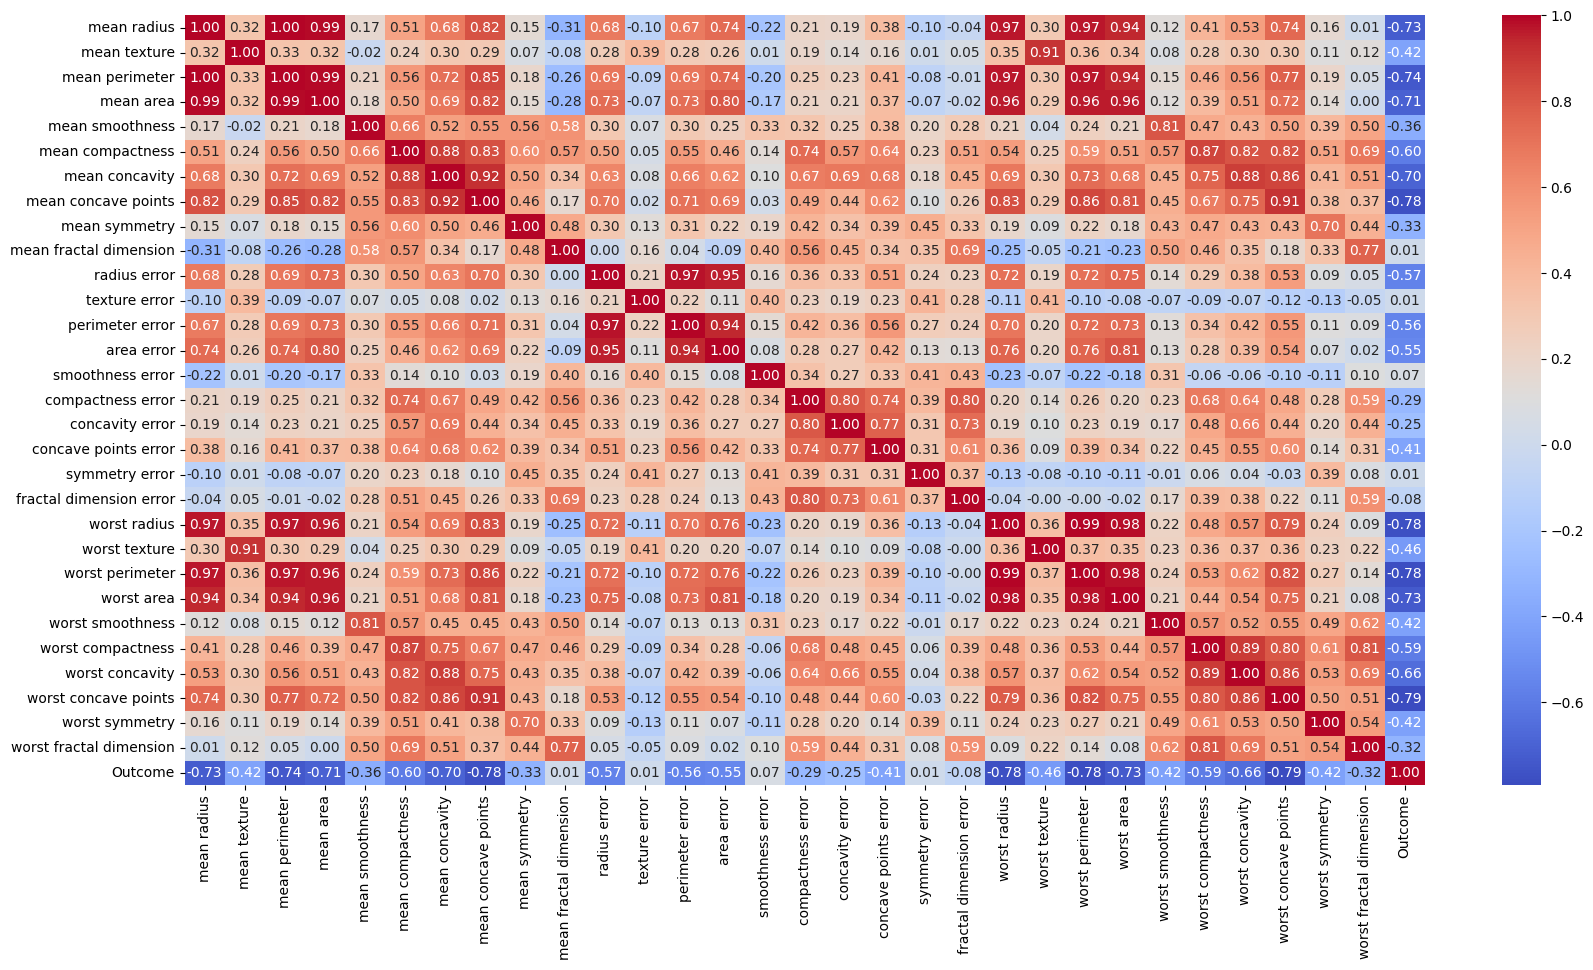

In [31]:
#Correlation Matrix of the Dataset
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [32]:
#Preprocessing the Data
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimensions before Preprocessing")
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

Dimensions before Preprocessing
X_train.shape: (455, 30)
X_test.shape: (114, 30)
y_train.shape: (455,)
y_test.shape: (114,)


In [33]:
#Scaling the Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]


In [34]:
#Converting into a Dataframe
X_train_df = pd.DataFrame(X_train_scaled, columns=cancer.feature_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=cancer.feature_names)
print(X_train_df.head())
print(X_test_df.head())

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0    -1.440753     -0.435319  ...        2.097242                 1.886450
1     1.974096      1.733026  ...        1.891161                 2.497838
2    -1.399982     -1.249622  ...        0.597602                 0.057894
3    -0.981797      1.416222  ...        0.798928                -0.134497
4    -1.117700     -1.010259  ...        1.033544                -0.205732

[5 rows x 30 columns]
   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0    -0.466497     -0.137289  ...        0.172757                 0.203730
1     1.365363      0.498665  ...       -0.561211                -1.008389
2     0.380066      0.069220  ...       -0.107831                -0.206293
3    -0.486317     -0.353185  ...       -0.553285                 0.545322
4    -0.729810     -1.113514  ...       -0.913135                -0.141789

[5 rows x 30 columns]


In [37]:
#Model Training
model_svc = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
model_svc.fit(X_train_scaled, y_train)
print("Support Vector Classifier Model trained successfully")

Support Vector Classifier Model trained successfully


In [38]:
#Model Evaluation
y_pred = model_svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9825


In [39]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[41  2]
 [ 0 71]]


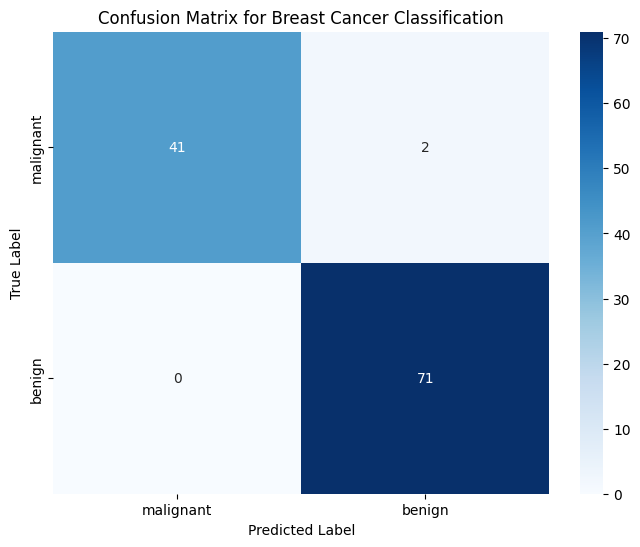

In [40]:
#Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Breast Cancer Classification')
plt.show()

In [41]:
#Printing the Classification Report
class_report= classification_report(y_test, y_pred, target_names=cancer.target_names)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [44]:
#Saving the Model and Scalar
model_filename_svc = 'svm_breast_cancer_model.pkl'
scaler_filename_svc = 'svm_breast_cancer_scaler.pkl'
joblib.dump(model_svc, model_filename_svc)
joblib.dump(scaler, scaler_filename_svc)
print("Models and Scalars saved successfully")

Models and Scalars saved successfully


In [45]:
#Loading the Model and Scalar
loaded_model_svc = joblib.load(model_filename_svc)
loaded_scaler_svc = joblib.load(scaler_filename_svc)
print("Models and Scalars loaded successfully")

Models and Scalars loaded successfully


In [50]:
#Giving Inputs and Predicting its Output
new_data = X_test_df.iloc[[0]]
print(new_data)

new_cancer_data = loaded_scaler_svc.transform(new_data)
print(new_cancer_data)

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0    -0.466497     -0.137289  ...        0.172757                  0.20373

[1 rows x 30 columns]
[[ -4.1292275   -4.53435775  -3.80017996  -1.84701352  13.30961087
   -1.18317327  -2.52408437  -8.23677231   8.52758875  10.05037868
   -1.4952504   -2.76433752  -1.46590753  -0.8536426   -6.15803499
  -20.26894659  -6.66071433 -40.44451652 -43.84326422 -31.62053797
   -3.43287913  -4.23929855  -3.22259192  -1.54720072  15.11408204
   -2.2554189   -1.48409499  -4.72816797  -1.86655289   6.72314629]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [55]:
#Printing the Prediction
predicted_diagnosis_encoded = loaded_model_svc.predict(new_cancer_data)
predicted_diagnosis_name = cancer.target_names[predicted_diagnosis_encoded[0]]
print(f"Predicted Diagnosis for the new input (encoded): {predicted_diagnosis_encoded[0]}")
print(f"Predicted Diagnosis name: {predicted_diagnosis_name}")

Predicted Diagnosis for the new input (encoded): 0
Predicted Diagnosis name: malignant
